In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from knn import KNN

In [2]:
breastc = datasets.load_breast_cancer()

X = breastc.data
Y = breastc.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2)

In [3]:
accuracy_results = []

for k in [3,5,7,9,11,13]:
    knn = KNN(k=k)
    knn.fit(X_train, Y_train)
    accuracy = knn.evaluate(X_test, Y_test)
    formatted_accuracy = '{:.2f}%'.format(accuracy*100)
    accuracy_results.append({'k': k, 'accuracy': formatted_accuracy})

results_df = pd.DataFrame(accuracy_results)
results_df.style

,k,accuracy
0,3,93.01%
1,5,94.41%
2,7,94.41%
3,9,93.71%
4,11,94.41%
5,13,94.41%


In [5]:
knn = KNN(2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

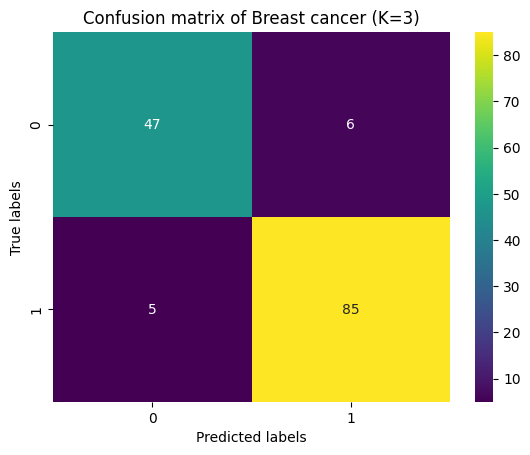

In [11]:
confusion_matrix = metrics.confusion_matrix(np.array(Y_test),y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

ax= plt.subplot()
sb.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax,cmap='viridis')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
plt.title('Confusion matrix of Breast cancer (K=3)')
plt.show()